# Data Visualization

Sometimes looking at tables just doesn't cut it, sometimes we need visual aids.

Looking at Data in new ways allows us to see new relationships or patterns that aren't easy to see with just numbers.

Maybe you need to make a presentation to stakeholders, this is where Data visualization comes in.

There are many options to choose from to do data visualization in `Python`, some libraries are:

* Matplotlib
* Seaborn
* Bokeh
* Plotly
* Altair

They all have pros and cons, some of them, like Seaborn, are wrappers over matplotlib.

## Pie Chart

Pie charts are ubiquitous, you see them in college classes, quarterly reports, in the newspaper and even memes.

They are used to demonstrate proportion.

For this section, we will keep using pandas to aggregate our data and matplotlib to make charts.

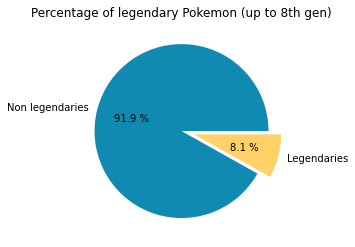

In [1]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

# We import our data
df = pd.read_csv('datasets/pokemon.csv')

# Create a variable to store a Pandas series with our True and False count values
legendaries = df['Legendary'].value_counts(sort=True)

# Create labels and colors arrays
labels = ['Non legendaries', 'Legendaries']
colors = ['#118AB2','#FFD166']

# We create, personalize and show our pie chart
plt.pie(legendaries, explode=(0,0.15), labels = labels, colors = colors, autopct='%.1f %%')

# We give it a title
plt.title('Percentage of legendary Pokemon (up to 8th gen)')

# We print our pie chart
plt.show()

## Scatter and Line Plots

These type of charts are used to visualize numerical data through time, you probably have seen them on financial reports or over the news.

Scatter plots are a little bit more complex in that they are also used to display the relationship between two variable. We can observe positive and negative correlations (*i.e.* if one increases the other also increases, one decreases then the other one too)

## Histograms

Histograms look a lot like bar charts, they are different in that a histogram shows the frequency of a value in a dataset divided in ranges.

## Box Plots

You may remember our friend from notebook \#2, this chart show us the five number summary:

* Minimum
* First quartile
* Median
* Third quartile
* Maximum

The 'box' portion show us the interquartile range or where 50% of the data is.

## Bar Chart

Bar charts describe values with bars or columns, they help us compare values against each other.

They also suffer from popularity and you will see them even when they aren't the best way to convey certain information.

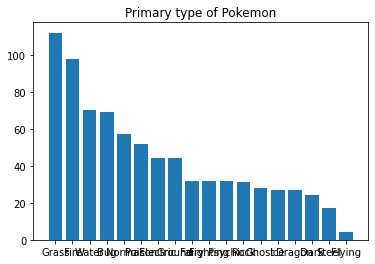

In [2]:
# We create the top-level container with fig while subplots creates the chart
fig, ax = plt.subplots()

# We select and filter our data (watch for compatible data types here)
types = df['Type 1'].unique()
counts = primarytype = df['Type 1'].value_counts(sort=True)

# We select our chart type and give it our data
ax.bar(types, counts, align='center')
ax.set_title('Primary type of Pokemon')

# We 'call' our chart
plt.show()

Oh, doesn't look good, let's try to do some changes:

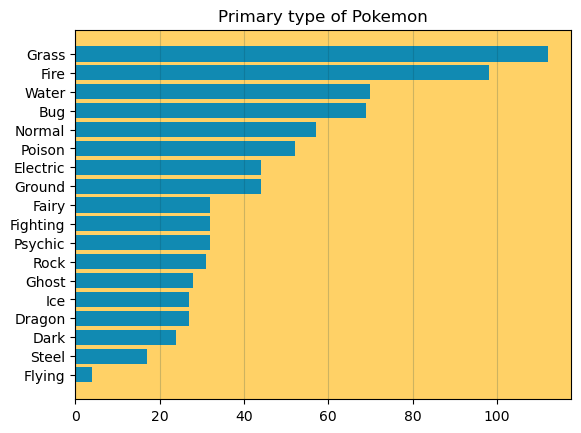

In [3]:
# Let's reset our styles (it's good practice to run it before every chart)
plt.rcdefaults()
fig, ax = plt.subplots()
types = df['Type 1'].unique()
counts = primarytype = df['Type 1'].value_counts(sort=True)

# Let's make it a horizontal bar chart instead, and add some color to the bars
ax.barh(types, counts, align='center', color = '#118AB2')
# We invert the axis because when we rotate it it changes the sort order
ax.invert_yaxis()
ax.set_title('Primary type of Pokemon')
# Change the background color
ax.set_facecolor('#FFD166')
# Add gridlines on the x axis, with a low opacity.
plt.grid(True, which='major', axis='x', alpha = 0.2, color = '#073B4C')
plt.show()

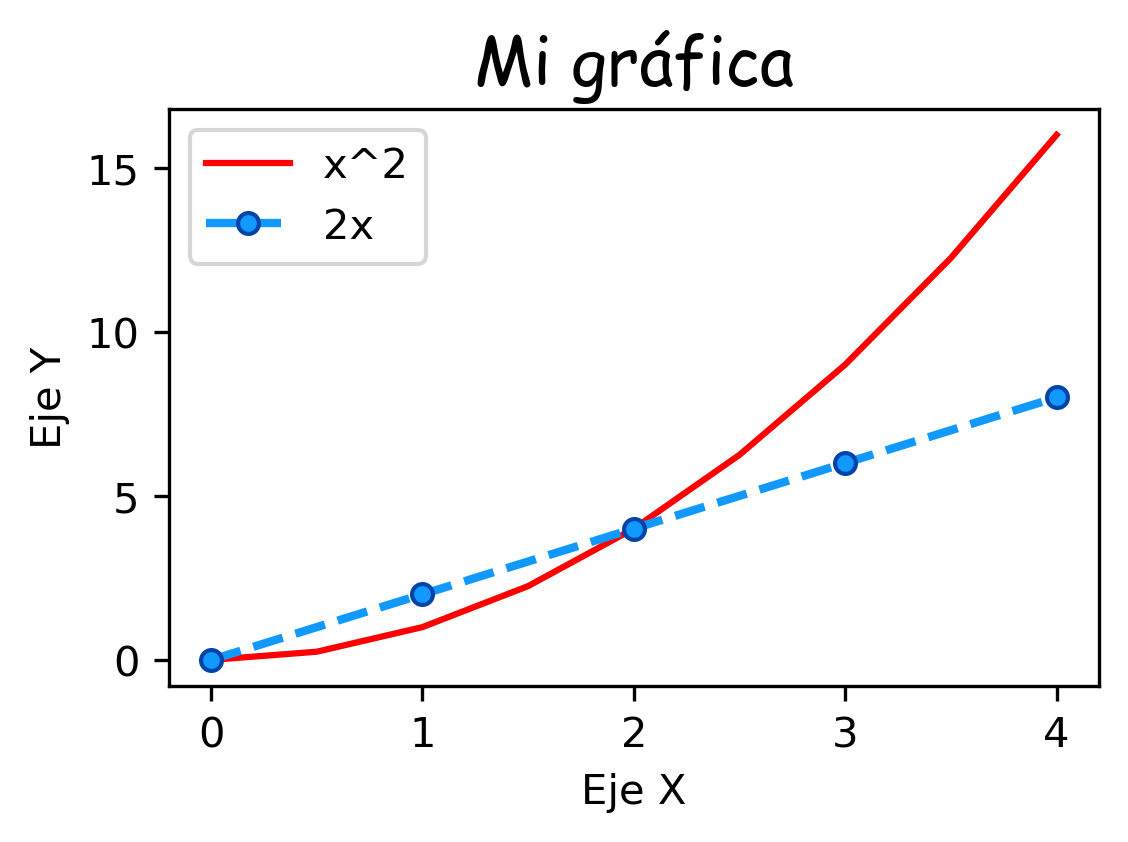

In [4]:
x = [0,1,2,3,4]
y = [0,2,4,6,8]

# resize your graph
plt.figure(figsize=(4,2.5), dpi=300)

x2 = np.arange(0,4.5,0.5)
plt.plot(x2, x2**2, 'r', label='x^2')

plt.plot(x,y, label = '2x', color='#1199FF', 
         linewidth=2, marker = '.', linestyle='--', 
         markersize = 10, markeredgecolor='#0044AA')
plt.title('Mi gráfica', fontdict={'fontname': 'Comic Sans MS','fontsize':16})
plt.xlabel("Eje X")
plt.ylabel("Eje Y")

plt.xticks([0,1,2,3,4])
#plt.yticks([0,2,4,6,8,10])

# Add legend
plt.legend()

# Save the graph as
# plt.savefig('migrafica.png', dpi=300)

plt.show()